# BLSTM (Bidirectional Long Short-Term Memory) :

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras import layers, models

# Chargement du dataset
df = pd.read_csv('../dataset_smote.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Remodelage des données pour une entrée BLSTM
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)  # Remarquez le remodelage ici
X_validation = X_validation.values.reshape(-1, X_validation.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

# Créez le modèle BLSTM
model = models.Sequential()

# Couche BLSTM
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(layers.Bidirectional(layers.LSTM(32)))

# Couche fully connected (densément connectée)
model.add(layers.Dense(128, activation='relu'))

# Couche de sortie
model.add(layers.Dense(1, activation='sigmoid'))  # Une seule sortie binaire (fraude ou non)

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy pour une classification binaire
              metrics=['accuracy'])

# Entraînez le modèle
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Seuil de décision pour les prédictions binaires

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Epoch 1/10
23226/23226 [==============================] - 445s 19ms/step - loss: 0.3427 - accuracy: 0.8412 - val_loss: 0.2924 - val_accuracy: 0.8719
Epoch 2/10
23226/23226 [==============================] - 432s 19ms/step - loss: 0.2851 - accuracy: 0.8722 - val_loss: 0.2773 - val_accuracy: 0.8753
Epoch 3/10
23226/23226 [==============================] - 427s 18ms/step - loss: 0.2756 - accuracy: 0.8768 - val_loss: 0.2736 - val_accuracy: 0.8773
Epoch 4/10
23226/23226 [==============================] - 449s 19ms/step - loss: 0.2713 - accuracy: 0.8790 - val_loss: 0.2651 - val_accuracy: 0.8803
Epoch 5/10
23226/23226 [==============================] - 512s 22ms/step - loss: 0.2682 - accuracy: 0.8804 - val_loss: 0.2837 - val_accuracy: 0.8724
Epoch 6/10
23226/23226 [==============================] - 561s 24ms/step - loss: 0.2671 - accuracy: 0.8810 - val_loss: 0.2673 - val_accuracy: 0.8801
Epoch 7/10
23226/23226 [==============================] - 554s 24ms/step - loss: 0.2637 - accuracy: 0.8824

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calcul des métriques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


blstm_results = pd.DataFrame([['BLSTM', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Sauvegardez le DataFrame dans un fichier CSV
blstm_results.to_csv('../evaluations/blstm_results.csv', index=False)

blstm_results

,Model,Accuracy,Precision,Recall,F1 Score
0,BLSTM,0.885271,0.938439,0.824642,0.877868


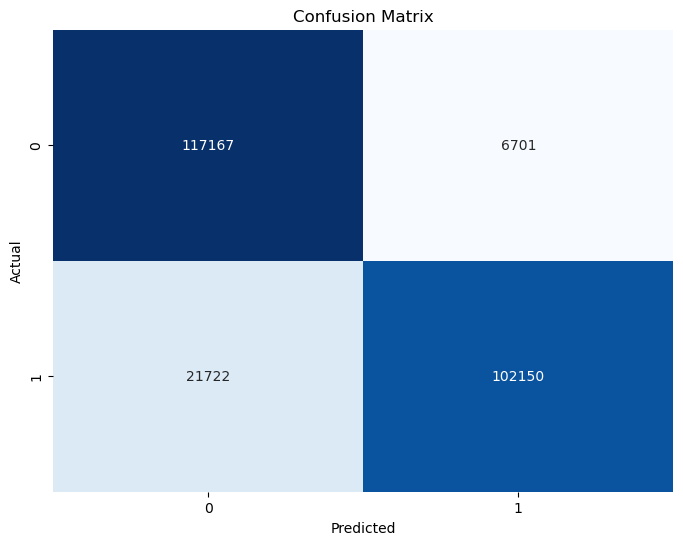

In [3]:

# Affichage de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

